In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Exercice 4 : impact et detection d'outliers



b_0=6.157222208750383 et b_1=5.416010953663307
s2 = 47.98078938976825


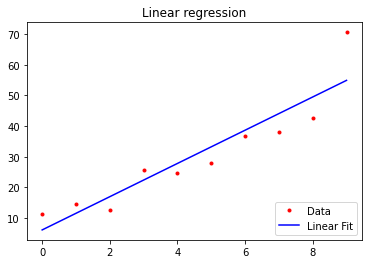

In [7]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))
print(f"s2 = {s2(y,lr.intercept_+lr.coef_[0]*x)}")

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant b_0, b_1 et s^2 sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulees.


### <span style="color:blue">REPONSE 4.1 :</span> 



In [ ]:
b_0 et b_1 augmentent, de même que s2

La variance estimée du bruit est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introiduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:blue">QUESTIONS 4.2 :</span> 

#### <span style="color:blue">QUESTION 4.2.a :</span> 
Pour chaque variable i, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les j, où  \hat{y_{(i)j}} est l'estimation de y_j à partir d'un modele  linéaire appris sans l'observation i.
#### <span style="color:blue">QUESTION 4.2.b :</span> 
En quoi le profil des e_{(i)j} est différent pour i=9 que pour les autres i
#### <span style="color:blue">QUESTION 4.2.c :</span> 
Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


In [8]:
x, y = generate_data(n_samples=10, outlier=True)

#### <span style="color:blue">REPONSE 4.2.a :</span> 


In [17]:
def profil_residuel(x, y, i):
    lr = LinearRegression()
    x_del_i = np.delete(x,i)
    y_del_i = np.delete(y,i)
    lr.fit(x_del_i[:, np.newaxis], y_del_i)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'
    return y - lr.predict([[x[i]]])

In [18]:
for i in range(10):
    print(profil_residuel(x,y,i))

[ 3.82844441  7.78842023 15.54494503 11.94420084 21.94372377 25.21500857
 25.39907937 31.76233491 31.04923401 63.40441968]
[-1.99920434  1.96077147  9.71729627  6.11655208 16.11607501 19.38735981
 19.57143061 25.93468615 25.22158526 57.57677092]
[-6.57510421 -2.6151284   5.1413964   1.54065221 11.54017514 14.81145995
 14.99553074 21.35878628 20.64568539 53.00087105]
[-13.10620937  -9.14623356  -1.38970876  -4.99045295   5.00906998
   8.28035479   8.46442558  14.82768112  14.11458023  46.46976589]
[-17.38849749 -13.42852168  -5.67199688  -9.27274107   0.72678186
   3.99806666   4.18213746  10.545393     9.83229211  42.18747777]
[-22.57850089 -18.61852507 -10.86200027 -14.46274446  -4.46322153
  -1.19193673  -1.00786593   5.35538961   4.64228871  36.99747438]
[-28.30513008 -24.34515427 -16.58862947 -20.18937366 -10.18985073
  -6.91856592  -6.73449513  -0.37123959  -1.08434048  31.27084519]
[-33.40126165 -29.44128584 -21.68476104 -25.28550523 -15.2859823
 -12.0146975  -11.8306267   -5.467

#### <span style="color:blue">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

In [19]:
def cook(x, y, i):
    e_i = profil_residuel(x, y, i)
    n = x.shape[0]
    h_ii = 1/n + (x[i] - np.mean(x))**2/np.sum((x-np.mean(x))**2)
    e_ii = e_i / (1 - h_ii)
    
    return e_ii-e_i

#### <span style="color:blue">REPONSE 4.2.c :</span> 


In [20]:
for i in range(10):
    print(cook(x,y,i))

[ 2.02056789  4.11055512  8.20427654  6.30388377 11.58140977 13.30792119
 13.40506967 16.76345453 16.38709573 33.46344372]
[-0.66102724  0.6483196   3.21297699  2.02240835  5.32870222  6.41033671
  6.47119883  8.57517848  8.33939512 19.03748071]
[-1.40204428 -0.55763767  1.09632717  0.32852143  2.46077264  3.15832602
  3.19757641  4.55444707  4.4023888  11.30165633]
[-1.9113222  -1.33382573 -0.20266586 -0.72777439  0.73048937  1.20755174
  1.2343954   2.16237016  2.05837628  6.77684086]
[-1.99732741 -1.54246533 -0.65151316 -1.06511215  0.0834817   0.45923739
  0.48038065  1.21129514  1.1293849   4.84585893]
[-2.59347645 -2.13861437 -1.24766219 -1.66126119 -0.51266734 -0.13691165
 -0.11576838  0.6151461   0.53323587  4.24970989]
[-4.12783147 -3.550335   -2.41917513 -2.94428366 -1.4860199  -1.00895753
 -0.98211387 -0.05413911 -0.15813299  4.56033159]
[-7.12232785 -6.27792125 -4.6239564  -5.39176215 -3.25951093 -2.56195755
 -2.52270716 -1.1658365  -1.31789478  5.58137276]
[-13.4933474  -1

## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
 * $\mathbb{E}[\epsilon_i] = 0$,
 * $\mathbb{V}[\epsilon_i] = \sigma^2$,
 * $\forall i \neq j, \: Cov(\epsilon_i, \epsilon_j) = 0$,
 
on a : 

* $\mathbb{E}[\hat{\beta_0}] = \beta_0$,
* $\mathbb{E}[\hat{\beta_1}] = \beta_1$,
* $\mathbb{V}[\hat{\beta_0}] = \sigma^2(\frac{1}{n} + \frac{\bar{x_n}^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\mathbb{V}[\hat{\beta_1}] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta_1} \sim \mathcal{N}(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \mathcal{X}^2(n-2)$,
* $\hat{\beta_1}$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon_i}^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que:

$$ \frac{ \frac{ \hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}}}}{\sqrt{\frac{\frac{(n-2)s^2}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x_n})^2}}} = T_n \sim T(n-2)$$ 

où $T(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse H_0 : $\beta_1 = 0$ en prenant un risque de 5%. 

In [ ]:
from scipy.stats import t


...